In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [3]:
sales_data = pd.read_csv('/content/Amazon Sales data.csv', parse_dates=['Order date','Ship date'])

In [4]:
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order date,Ship date,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,255.28,159.42,2533654.00,1582243.50,951410.50,669165933,9925
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,205.70,117.11,576782.80,328376.44,248406.36,963881480,2804
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,651.21,524.96,1158502.59,933903.84,224598.75,341417157,1779
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,9.33,6.92,75591.66,56065.84,19525.82,514321792,8102
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,651.21,524.96,3296425.02,2657347.52,639077.50,115456712,5062


In [5]:
sales_data.shape

(100, 14)

In [6]:
sales_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order date', 'Ship date', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Order ID', 'Units Sold'],
      dtype='object')

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order date      100 non-null    datetime64[ns]
 6   Ship date       100 non-null    datetime64[ns]
 7   Unit Price      100 non-null    float64       
 8   Unit Cost       100 non-null    float64       
 9   Total Revenue   100 non-null    float64       
 10  Total Cost      100 non-null    float64       
 11  Total Profit    100 non-null    float64       
 12  Order ID        100 non-null    int64         
 13  Units Sold      100 non-null    int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [8]:
#checking no. of null values
sales_data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order date        0
Ship date         0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Order ID          0
Units Sold        0
dtype: int64

In [9]:
sales_data.describe()

,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,5.550204e+08,5128.710000
std,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.606153e+08,2794.484562
min,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,1.146066e+08,124.000000
25%,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,3.389225e+08,2836.250000
50%,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,5.577086e+08,5382.500000
75%,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,7.907551e+08,7369.000000
max,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,9.940222e+08,9925.000000


In [10]:
sales_data1 = sales_data.copy()

In [11]:
# creating Year, Month, Quarter, Day Columns in sales_data1

sales_data1['Ship_Year']= sales_data['Ship date'].dt.year
sales_data1['Ship_Month']= sales_data['Ship date'].dt.month
sales_data1['Ship_Quarter']= sales_data['Ship date'].dt.quarter
sales_data1['Ship_Day']= sales_data['Ship date'].dt.day

In [12]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order date      100 non-null    datetime64[ns]
 6   Ship date       100 non-null    datetime64[ns]
 7   Unit Price      100 non-null    float64       
 8   Unit Cost       100 non-null    float64       
 9   Total Revenue   100 non-null    float64       
 10  Total Cost      100 non-null    float64       
 11  Total Profit    100 non-null    float64       
 12  Order ID        100 non-null    int64         
 13  Units Sold      100 non-null    int64         
 14  Ship_Year       100 non-null    int64         
 15  Ship_Mo

In [13]:
# Creating DataFrame only with necessary values.
sales_data2 = sales_data1[['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order date', 'Ship date', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Order ID', 'Units Sold', 'Ship_Year', 'Ship_Month', 'Ship_Quarter', 'Ship_Day']]

In [14]:
sales_data2.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order date        0
Ship date         0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Order ID          0
Units Sold        0
Ship_Year         0
Ship_Month        0
Ship_Quarter      0
Ship_Day          0
dtype: int64

<ipython-input-15-a0931919ed9b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data2.corr(method='pearson'),annot=True, vmin=-1, vmax=1, cmap='YlGnBu')


<Axes: >

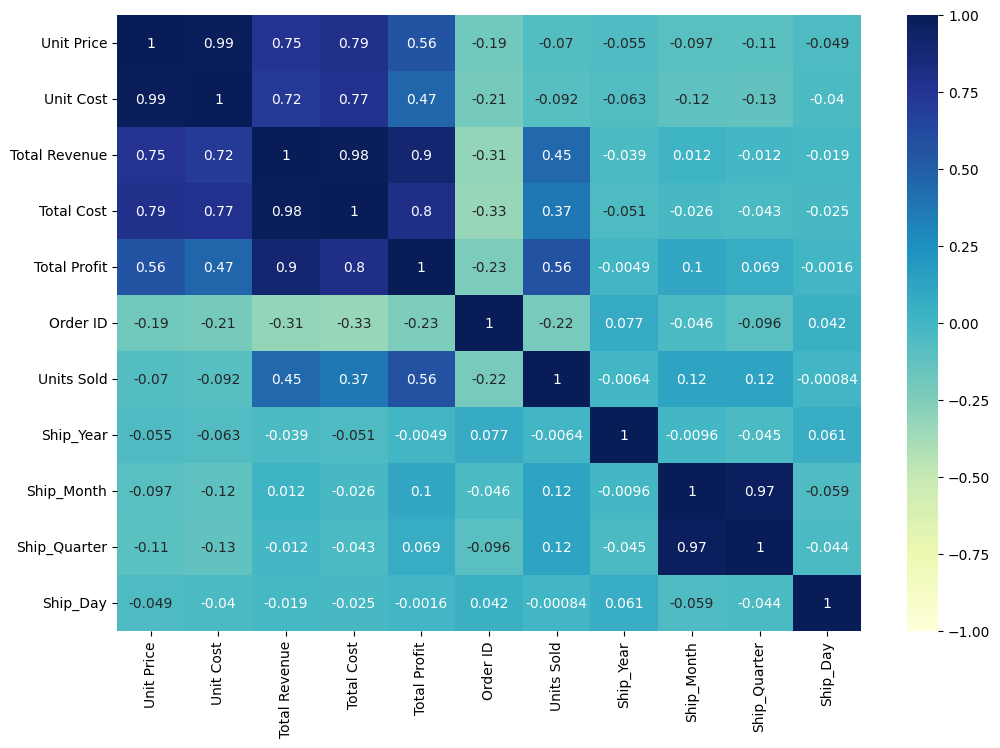

In [15]:
#checking the correlation
plt.figure(figsize=(12,8))
sns.heatmap(sales_data2.corr(method='pearson'),annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

In [16]:
sales_data2.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order date,Ship date,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold,Ship_Year,Ship_Month,Ship_Quarter,Ship_Day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,255.28,159.42,2533654.00,1582243.50,951410.50,669165933,9925,2010,6,2,27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,205.70,117.11,576782.80,328376.44,248406.36,963881480,2804,2012,9,3,15
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,651.21,524.96,1158502.59,933903.84,224598.75,341417157,1779,2014,5,2,8
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,9.33,6.92,75591.66,56065.84,19525.82,514321792,8102,2014,7,3,5
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,651.21,524.96,3296425.02,2657347.52,639077.50,115456712,5062,2013,2,1,6


In [17]:
sales_data2.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order date,Ship date,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold,Ship_Year,Ship_Month,Ship_Quarter,Ship_Day
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,2011-09-03,109.28,35.84,97040.64,31825.92,65214.72,512878119,888,2011,9,3,3
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,2011-12-28,9.33,6.92,58471.11,43367.64,15103.47,810711038,6267,2011,12,4,28
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,2016-06-29,154.06,90.93,228779.10,135031.05,93748.05,728815257,1485,2016,6,2,29
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,2015-08-08,81.73,56.67,471336.91,326815.89,144521.02,559427106,5767,2015,8,3,8
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2012-02-10,2012-02-15,668.27,502.54,3586605.09,2697132.18,889472.91,665095412,5367,2012,2,1,15


In [18]:
sales_data2.rename(columns = {'Item Type':'Item'}, inplace = True)

In [19]:
sales_data2.head()

,Region,Country,Item,Sales Channel,Order Priority,Order date,Ship date,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold,Ship_Year,Ship_Month,Ship_Quarter,Ship_Day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,255.28,159.42,2533654.00,1582243.50,951410.50,669165933,9925,2010,6,2,27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,205.70,117.11,576782.80,328376.44,248406.36,963881480,2804,2012,9,3,15
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,651.21,524.96,1158502.59,933903.84,224598.75,341417157,1779,2014,5,2,8
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,9.33,6.92,75591.66,56065.84,19525.82,514321792,8102,2014,7,3,5
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,651.21,524.96,3296425.02,2657347.52,639077.50,115456712,5062,2013,2,1,6


In [20]:
sales_data2.Item.value_counts()

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item, dtype: int64

In [21]:
sales_data2.describe()

,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold,Ship_Year,Ship_Month,Ship_Quarter,Ship_Day
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000
mean,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,5.550204e+08,5128.710000,2013.270000,6.550000,2.500000,16.450000
std,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.606153e+08,2794.484562,2.054092,3.502885,1.141504,9.016679
min,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,1.146066e+08,124.000000,2010.000000,1.000000,1.000000,1.000000
25%,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,3.389225e+08,2836.250000,2012.000000,3.000000,1.000000,8.000000
50%,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,5.577086e+08,5382.500000,2013.000000,6.500000,2.500000,17.000000
75%,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,7.907551e+08,7369.000000,2015.000000,10.000000,4.000000,25.000000
max,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,9.940222e+08,9925.000000,2017.000000,12.000000,4.000000,31.000000


##Yearly Sales Record:

In [22]:
sales_data2.columns

Index(['Region', 'Country', 'Item', 'Sales Channel', 'Order Priority',
       'Order date', 'Ship date', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Order ID', 'Units Sold', 'Ship_Year',
       'Ship_Month', 'Ship_Quarter', 'Ship_Day'],
      dtype='object')

In [23]:
Yearly_Sales =  sales_data2[['Region', 'Country', 'Item', 'Sales Channel', 'Order Priority',
       'Order date', 'Ship date', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Order ID', 'Units Sold', 'Ship_Year',
       'Ship_Month',]]

<ipython-input-24-e1d6983f8b03>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_Sales01 = Yearly_Sales.groupby('Ship_Year').sum().reset_index()


,Ship_Year,Total Cost
0,2010,10616258.38
1,2011,8513570.23
2,2012,24500421.12
3,2013,13494604.87
4,2014,10871176.50
5,2015,8431443.42
6,2016,7469029.21
7,2017,9284066.18


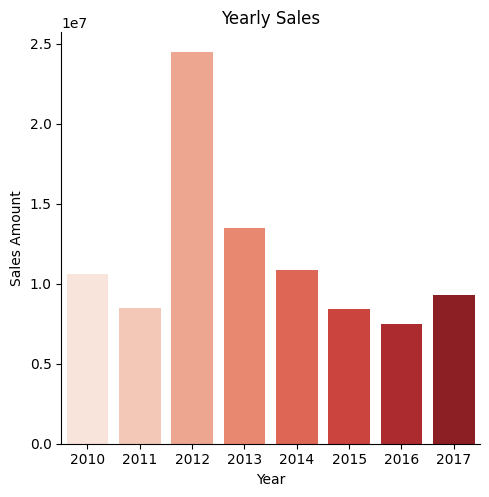

In [24]:
Yearly_Sales01 = Yearly_Sales.groupby('Ship_Year').sum().reset_index()
sns.catplot(y = 'Total Cost', x = 'Ship_Year', data = Yearly_Sales01, palette='Reds',kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')
Yearly_Sales01[['Ship_Year', 'Total Cost']]

<ipython-input-25-3f26a3cd64c8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data= sales_data2.groupby(['Ship date','Ship_Year','Ship_Month']).sum(),


<Axes: xlabel='Ship_Month', ylabel='Total Cost'>

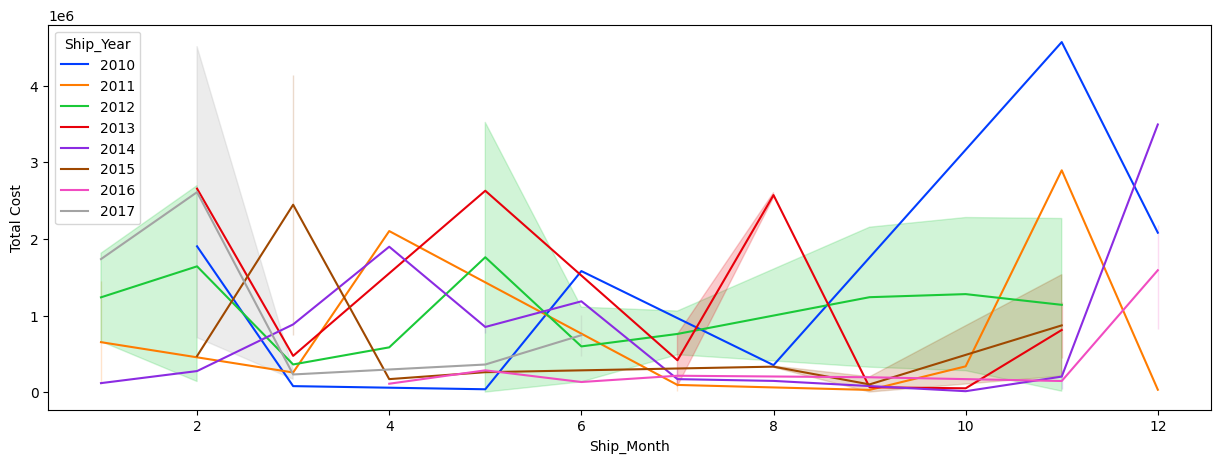

In [25]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Total Cost', x = 'Ship_Month',
             data= sales_data2.groupby(['Ship date','Ship_Year','Ship_Month']).sum(),
             hue = 'Ship_Year', palette='bright')

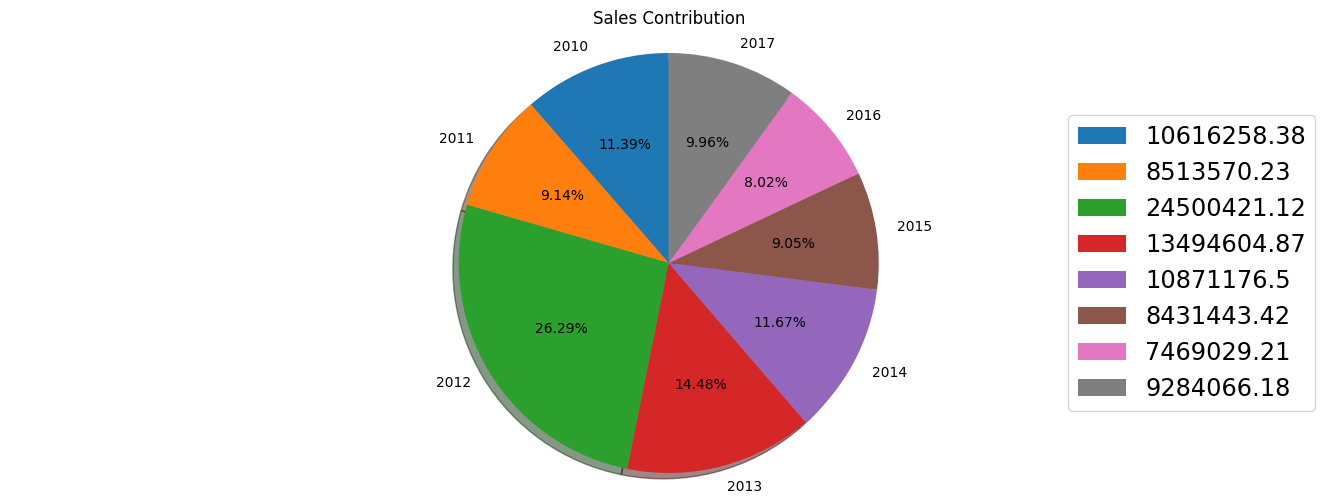

In [26]:
#Plotting Piechart to know Sales Share among 3 years
plt.figure(figsize=(17,6))
plt.pie('Total Cost',labels='Ship_Year',data=Yearly_Sales01,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Sales Contribution')
plt.legend(round(Yearly_Sales01['Total Cost'],2), loc=7, fontsize = 'xx-large')
plt.show()

In [27]:
sales_data2.columns

Index(['Region', 'Country', 'Item', 'Sales Channel', 'Order Priority',
       'Order date', 'Ship date', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Order ID', 'Units Sold', 'Ship_Year',
       'Ship_Month', 'Ship_Quarter', 'Ship_Day'],
      dtype='object')

Text(0, 0.5, 'Count')

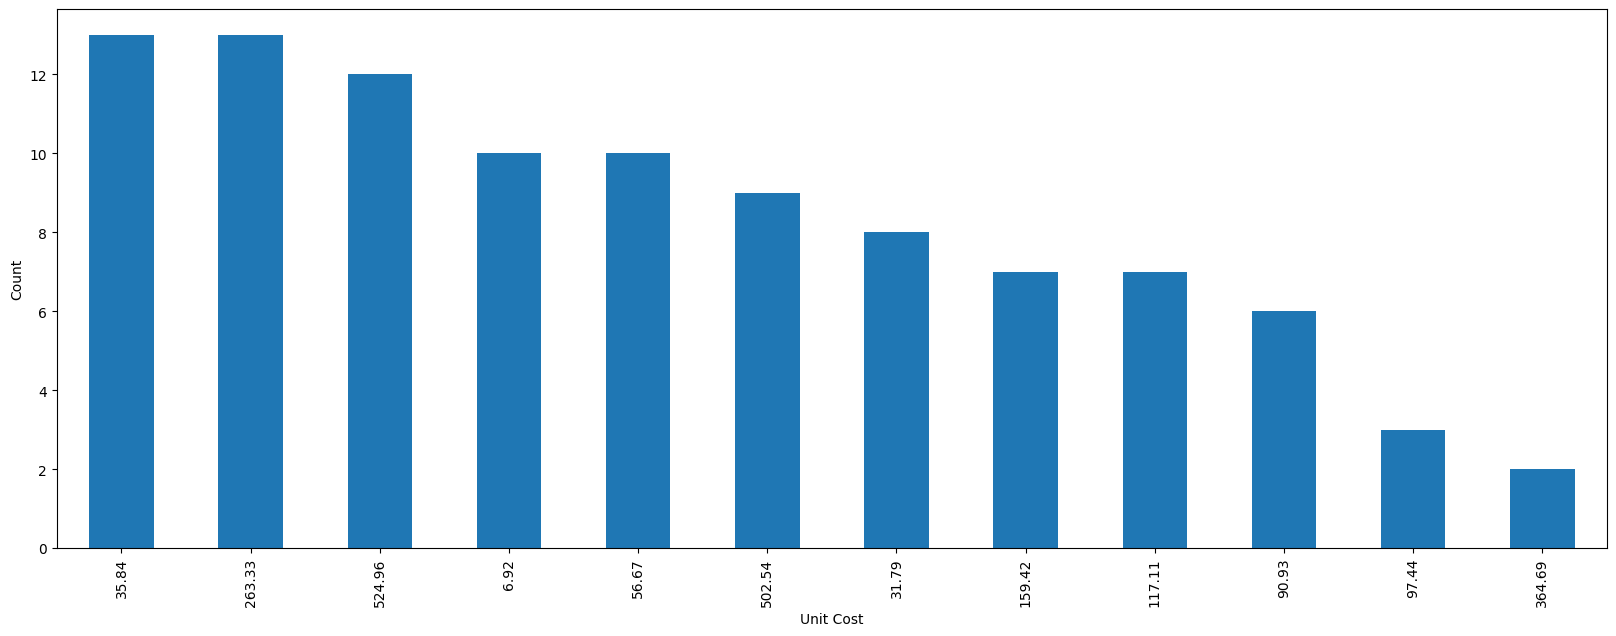

In [28]:
plt.figure(figsize=(20, 7))
sales_data2['Unit Cost'].value_counts().plot.bar()
plt.xlabel('Unit Cost')
plt.ylabel('Count')

##Yearly-Monthwise Records:

In [29]:
Yearly_Monthwise_Sales = sales_data2.groupby(['Ship_Year','Ship_Month']).sum().reset_index()
Yearly_Monthwise_Sales.describe()

<ipython-input-29-9044f006f830>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_Monthwise_Sales = sales_data2.groupby(['Ship_Year','Ship_Month']).sum().reset_index()


,Ship_Year,Ship_Month,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold,Ship_Quarter,Ship_Day
count,63.000000,63.000000,63.000000,63.000000,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000
mean,2013.301587,6.333333,439.303651,303.250794,2.180139e+06,1.479057e+06,7.010825e+05,8.809848e+08,8140.809524,3.968254,26.111111
std,2.129932,3.426651,444.971868,328.425455,2.279387e+06,1.588239e+06,7.632035e+05,5.332378e+08,5496.359974,3.079423,15.181813
min,2010.000000,1.000000,9.330000,6.920000,2.040471e+04,1.513404e+04,5.270670e+03,1.154567e+08,888.000000,1.000000,1.000000
25%,2012.000000,3.000000,109.280000,56.670000,3.937805e+05,2.122014e+05,1.273886e+05,5.163495e+08,4745.000000,2.000000,19.000000
50%,2013.000000,6.000000,255.280000,159.420000,1.352371e+06,6.708028e+05,5.391965e+05,8.324013e+08,6457.000000,3.000000,25.000000
75%,2015.000000,9.000000,664.405000,524.960000,3.212633e+06,2.382881e+06,9.668489e+05,1.033077e+09,9915.000000,6.000000,30.000000
max,2017.000000,12.000000,1987.750000,1530.040000,1.037040e+07,6.372028e+06,3.998377e+06,3.655704e+09,23256.000000,16.000000,77.000000


**************************************************Yearly-Monthwise Sales Trend**************************************************


<Figure size 2000x900 with 0 Axes>

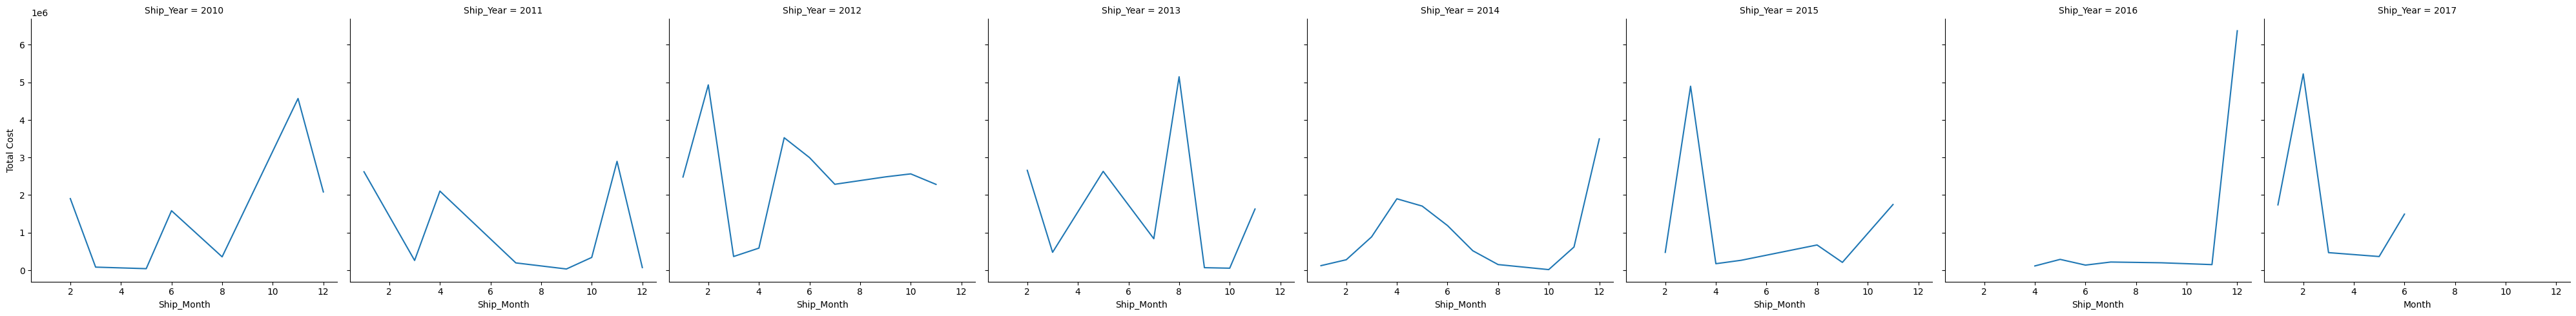

In [30]:
plt.figure(figsize=(20, 9))
sns.relplot(x ='Ship_Month',y = 'Total Cost', data=Yearly_Monthwise_Sales,height=5,
            kind = 'line', aspect = 1, col = 'Ship_Year')
plt.xlabel('Month')
plt.ylabel('Total Cost')
print('*'*50+'Yearly-Monthwise Sales Trend'+'*'*50)

<Axes: xlabel='Total Cost', ylabel='Count'>

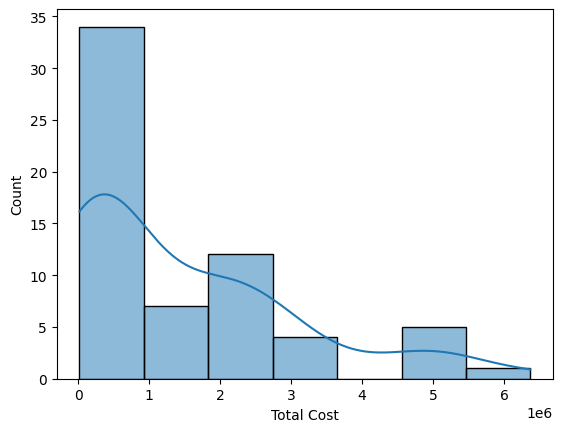

In [31]:
sns.histplot(Yearly_Monthwise_Sales['Total Cost'], kde = True)

##Monthly Records:

In [32]:
Monthly_sales = sales_data2.groupby(['Ship_Year','Ship_Month']).sum().reset_index()
Monthly_sales.describe()

<ipython-input-32-d05d0eb8a28c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Monthly_sales = sales_data2.groupby(['Ship_Year','Ship_Month']).sum().reset_index()


,Ship_Year,Ship_Month,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order ID,Units Sold,Ship_Quarter,Ship_Day
count,63.000000,63.000000,63.000000,63.000000,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000
mean,2013.301587,6.333333,439.303651,303.250794,2.180139e+06,1.479057e+06,7.010825e+05,8.809848e+08,8140.809524,3.968254,26.111111
std,2.129932,3.426651,444.971868,328.425455,2.279387e+06,1.588239e+06,7.632035e+05,5.332378e+08,5496.359974,3.079423,15.181813
min,2010.000000,1.000000,9.330000,6.920000,2.040471e+04,1.513404e+04,5.270670e+03,1.154567e+08,888.000000,1.000000,1.000000
25%,2012.000000,3.000000,109.280000,56.670000,3.937805e+05,2.122014e+05,1.273886e+05,5.163495e+08,4745.000000,2.000000,19.000000
50%,2013.000000,6.000000,255.280000,159.420000,1.352371e+06,6.708028e+05,5.391965e+05,8.324013e+08,6457.000000,3.000000,25.000000
75%,2015.000000,9.000000,664.405000,524.960000,3.212633e+06,2.382881e+06,9.668489e+05,1.033077e+09,9915.000000,6.000000,30.000000
max,2017.000000,12.000000,1987.750000,1530.040000,1.037040e+07,6.372028e+06,3.998377e+06,3.655704e+09,23256.000000,16.000000,77.000000


<ipython-input-33-0f39edd47b9a>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(y ='Unit Cost',x = 'Total Cost', data=sales_data2,height = 3,aspect=1,


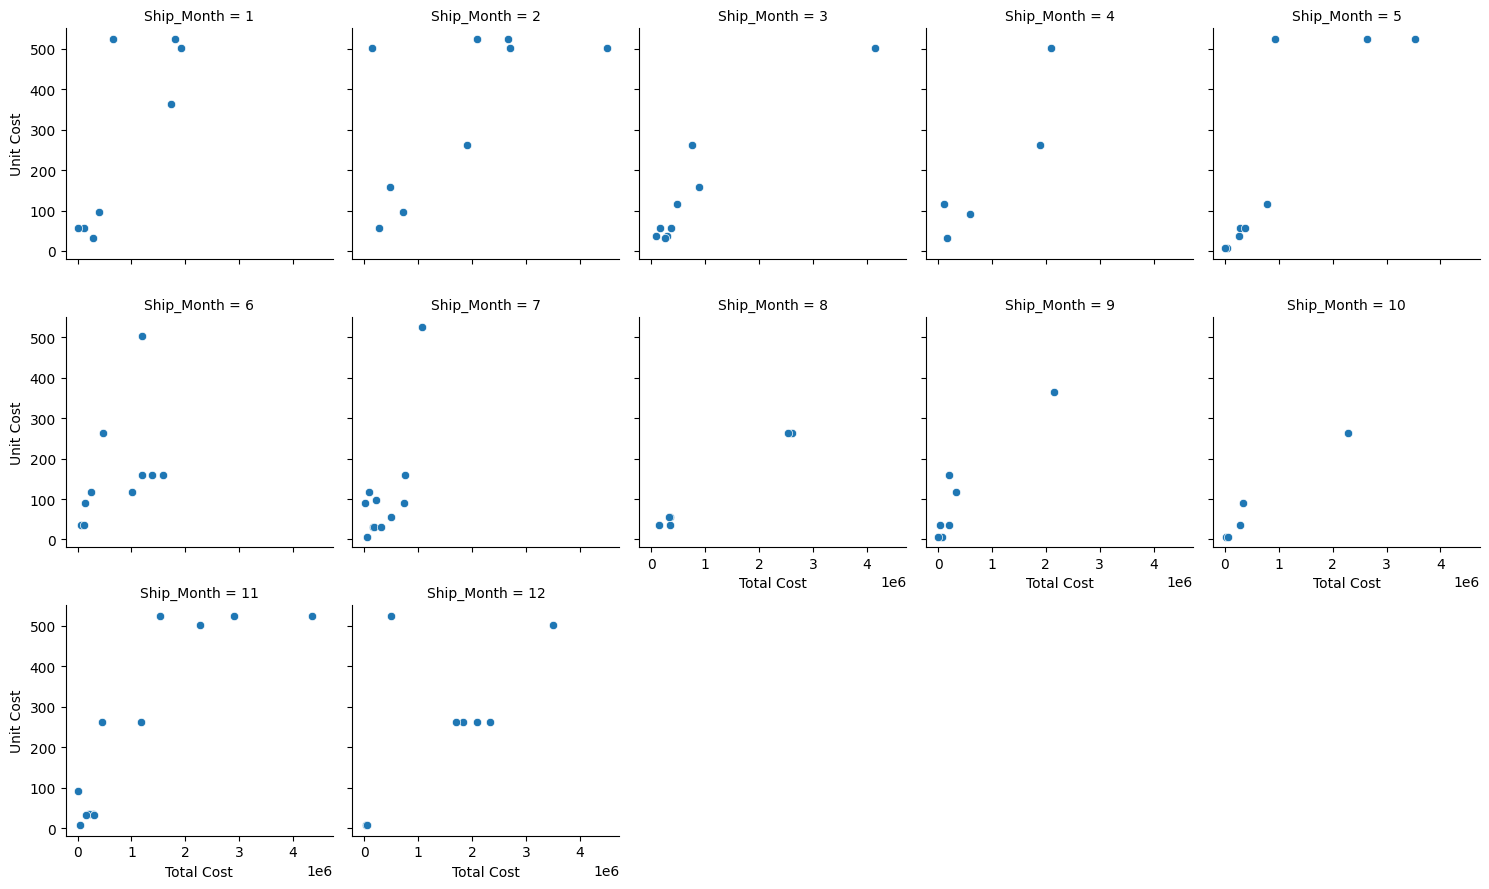

In [33]:
sns.relplot(y ='Unit Cost',x = 'Total Cost', data=sales_data2,height = 3,aspect=1,
            col = 'Ship_Month',col_wrap=5, palette='muted')

**************************************************Monthly Sales Trend in 2017**************************************************


<Figure size 800x2000 with 0 Axes>

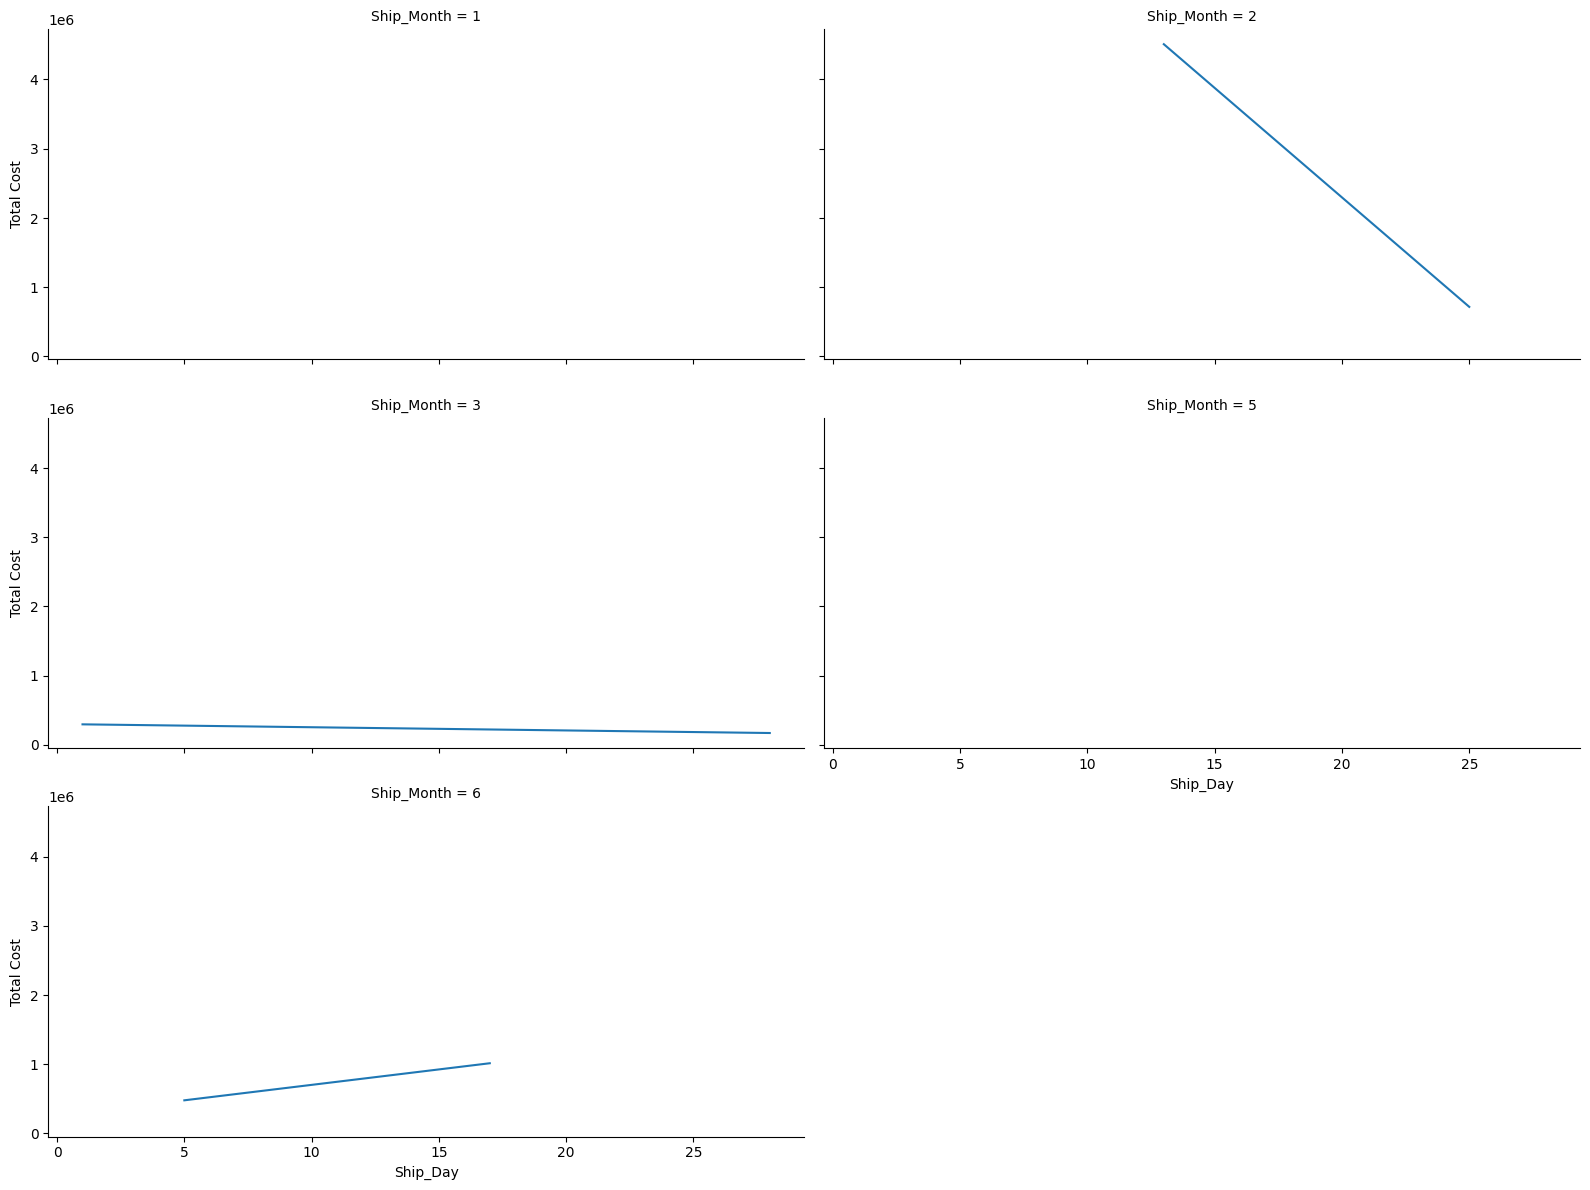

In [37]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Ship_Day',y = 'Total Cost', data= sales_data2.query('Ship_Year == 2017'),
            kind = 'line', col = 'Ship_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Total Cost')
print('*'*50+'Monthly Sales Trend in 2017'+'*'*50)

##Profits Records:

In [39]:
sales_data2.columns

Index(['Region', 'Country', 'Item', 'Sales Channel', 'Order Priority',
       'Order date', 'Ship date', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Order ID', 'Units Sold', 'Ship_Year',
       'Ship_Month', 'Ship_Quarter', 'Ship_Day'],
      dtype='object')

,Ship_Year,Total Profit
0,2010,5987980.15
1,2011,2946149.26
2,2012,9649456.37
3,2013,6662167.54
4,2014,5932714.18
5,2015,3996539.44
6,2016,4903838.01
7,2017,4089353.45


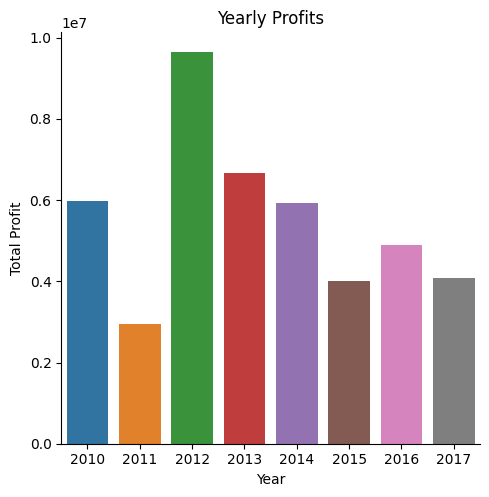

In [40]:
sns.catplot(y = 'Total Profit', x = 'Ship_Year', data = Yearly_Sales01,kind="bar")
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Yearly Profits')
Yearly_Sales01[['Ship_Year', 'Total Profit']]

,Ship_Year,Units Sold
0,2010,57468
1,2011,55414
2,2012,101424
3,2013,62538
4,2014,94165
5,2015,49480
6,2016,43156
7,2017,49226


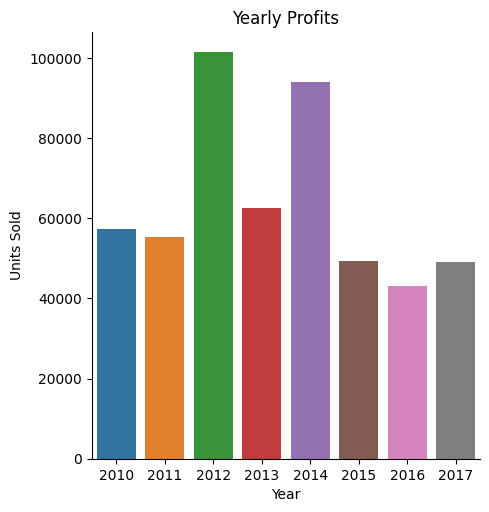

In [44]:
sns.catplot(y = 'Units Sold', x = 'Ship_Year', data = Yearly_Sales01,kind="bar")
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.title('Yearly Profits')
Yearly_Sales01[['Ship_Year', 'Units Sold']]

<ipython-input-42-b46d43cd2da9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data= sales_data2.groupby(['Ship date','Ship_Year','Ship_Month']).sum(),


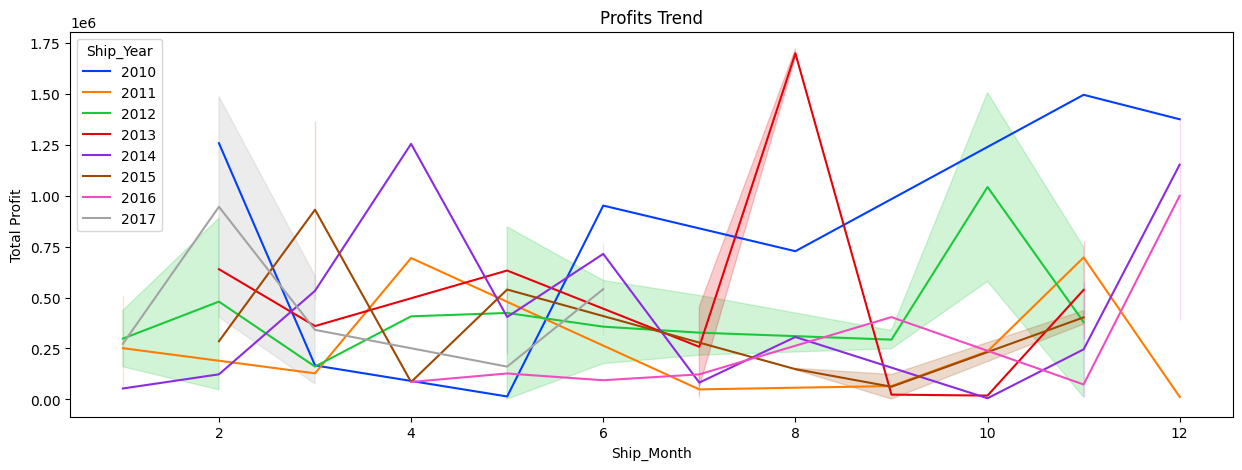

In [42]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Total Profit', x = 'Ship_Month',
             data= sales_data2.groupby(['Ship date','Ship_Year','Ship_Month']).sum(),
             hue = 'Ship_Year', palette='bright')
plt.title('Profits Trend')
plt.show()

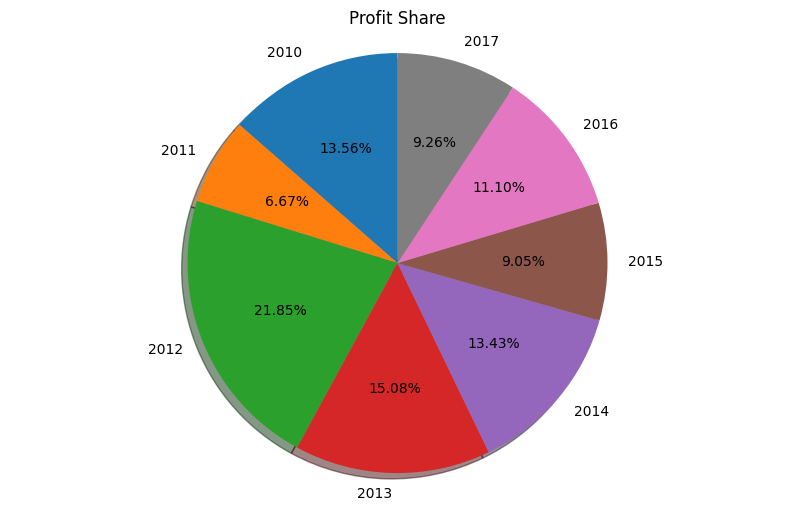

In [43]:
plt.figure(figsize=(10,6))
plt.pie('Total Profit',labels='Ship_Year',data=Yearly_Sales01[['Ship_Year', 'Total Profit']],
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Profit Share')
plt.show()

##Top 10 Records:

In [56]:
Top10byCustKey17 = Yearly_Sales[Yearly_Sales['Ship_Year']==2017].groupby(['Ship_Year','Order ID']).sum()
Top10byCustKey17 = Top10byCustKey17.sort_values('Total Profit',ascending = False).reset_index().head(10)

<ipython-input-56-3119354ad5a2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey17 = Yearly_Sales[Yearly_Sales['Ship_Year']==2017].groupby(['Ship_Year','Order ID']).sum()


,Order ID,Total Profit
0,522840487,1487261.02
1,555990016,766835.04
2,187310731,606834.72
3,756274640,404010.78
4,898523128,315574.05
5,825304400,272672.40
6,456767165,160609.54
7,699285638,75555.90


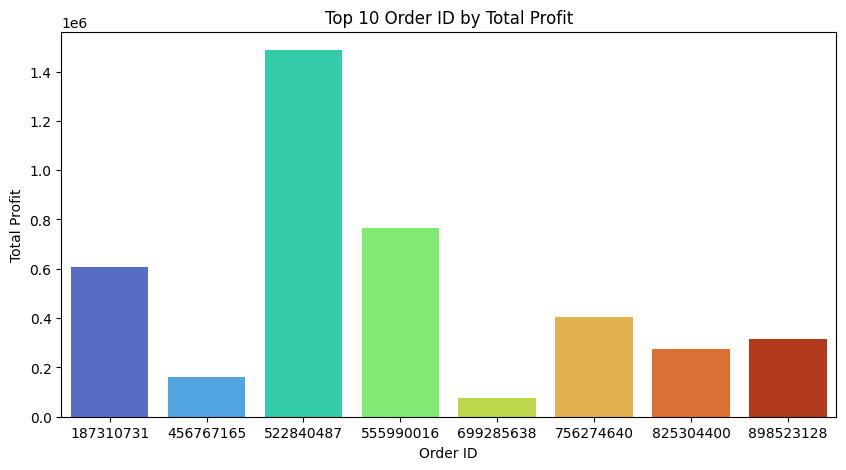

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='Order ID', y='Total Profit',data = Top10byCustKey17, palette = 'turbo')
plt.title('Top 10 Order ID by Total Profit')
Top10byCustKey17[['Order ID', 'Total Profit']]

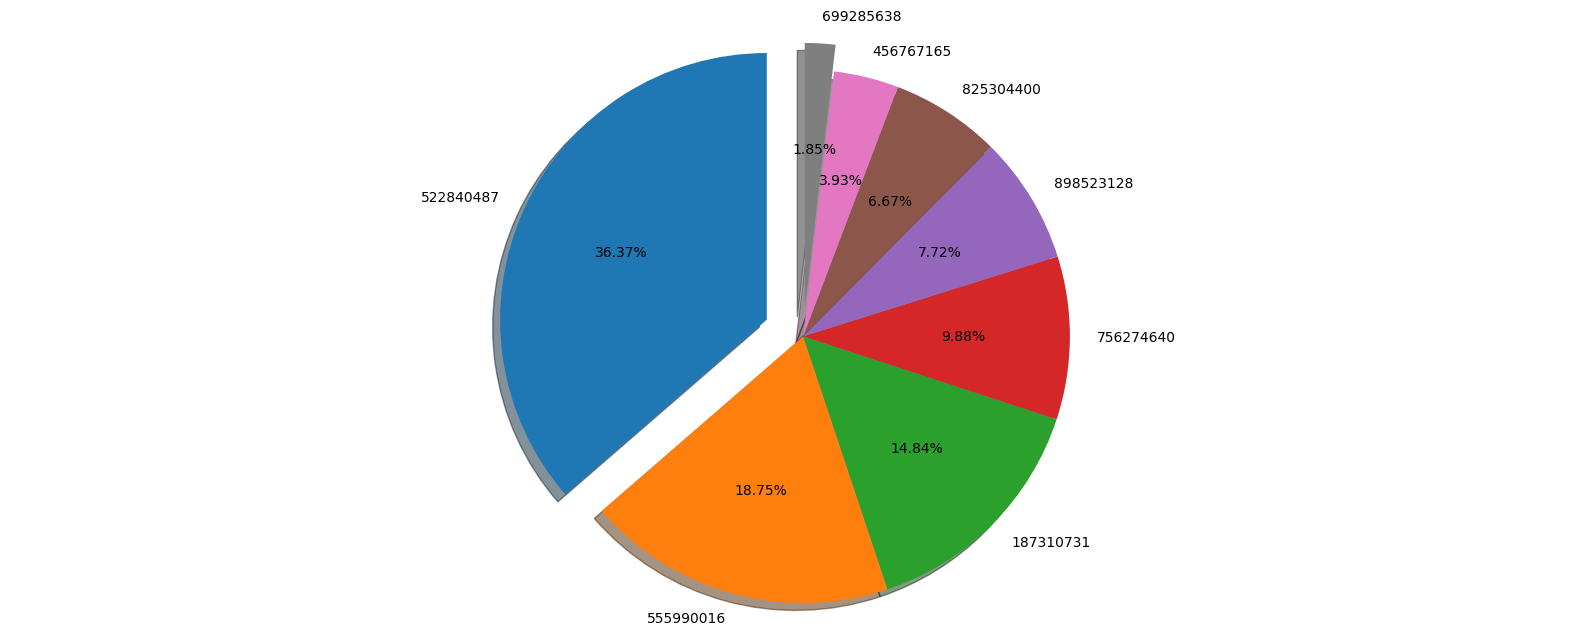

In [63]:
plt.figure(figsize=(20,8))
plt.pie('Total Profit',labels='Order ID',data=Top10byCustKey17,
        autopct='%1.2f%%',shadow=True,startangle=90, explode = ( 0.15, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.show()

In [69]:
Top10byCustKey12 = Yearly_Sales[Yearly_Sales['Ship_Year']==2012].groupby(['Ship_Year','Order ID']).sum()
Top10byCustKey12 = Top10byCustKey12.sort_values('Total Profit',ascending = False).reset_index().head(10)

<ipython-input-69-62c07c2908ec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey12 = Yearly_Sales[Yearly_Sales['Ship_Year']==2012].groupby(['Ship_Year','Order ID']).sum()


,Order ID,Total Profit
0,249693334,1505888.07
1,665095412,889472.91
2,320009267,846885.00
3,688288152,825738.04
4,213487374,747939.49
5,663110148,579000.96
6,871543967,510216.66
7,189965903,503358.75
8,441888415,436446.25
9,827844560,407630.41


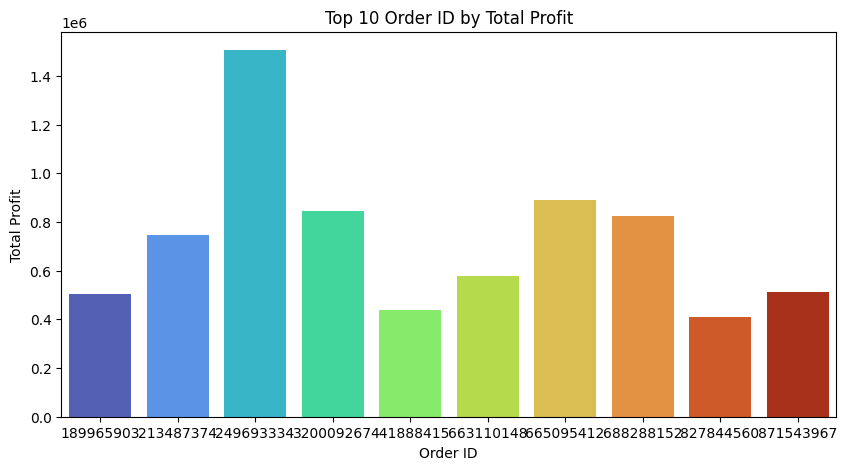

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(x='Order ID', y='Total Profit',data = Top10byCustKey12, palette = 'turbo')
plt.title('Top 10 Order ID by Total Profit')
Top10byCustKey12[['Order ID', 'Total Profit']]

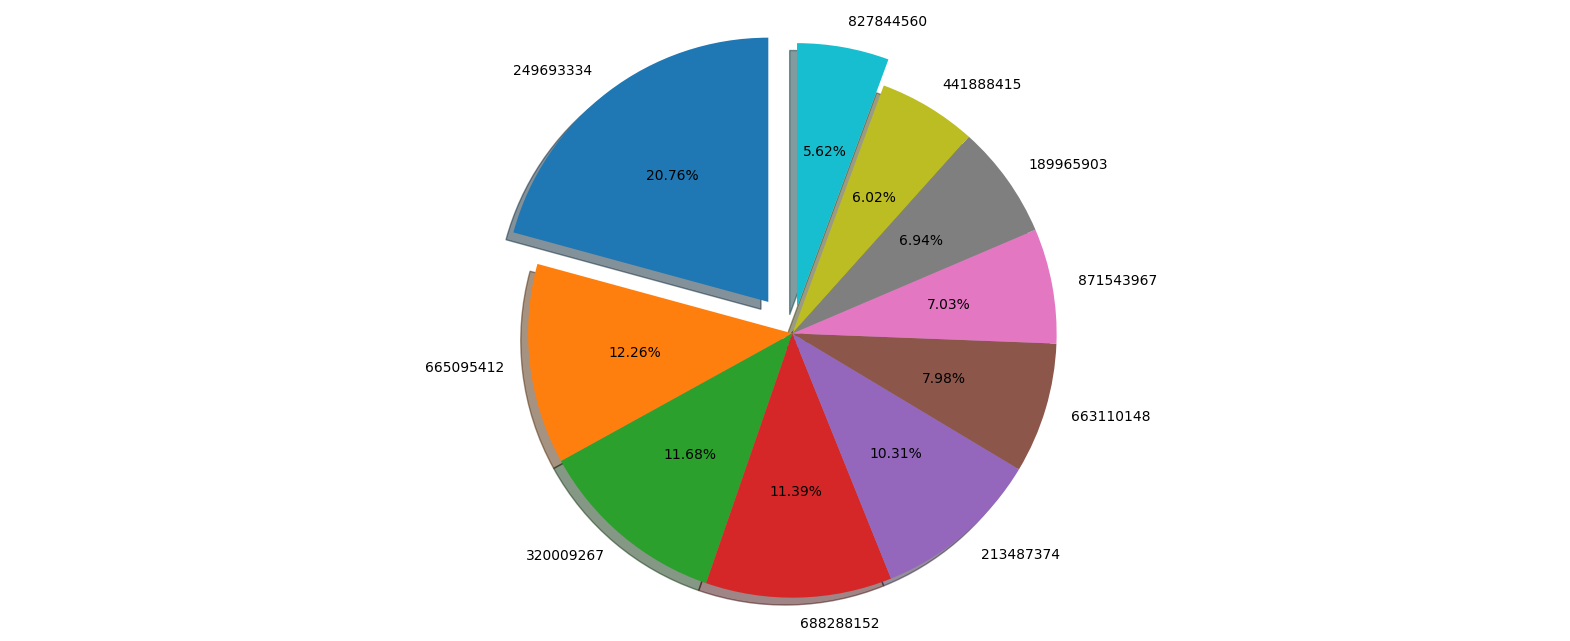

In [74]:
plt.figure(figsize=(20,8))
plt.pie('Total Profit',labels='Order ID',data=Top10byCustKey12,
        autopct='%1.2f%%',shadow=True,startangle=90, explode = ( 0.15, 0,0,0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.show()